In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("./kaggle/input/churn_modelling/Churn_Modelling.csv")


In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

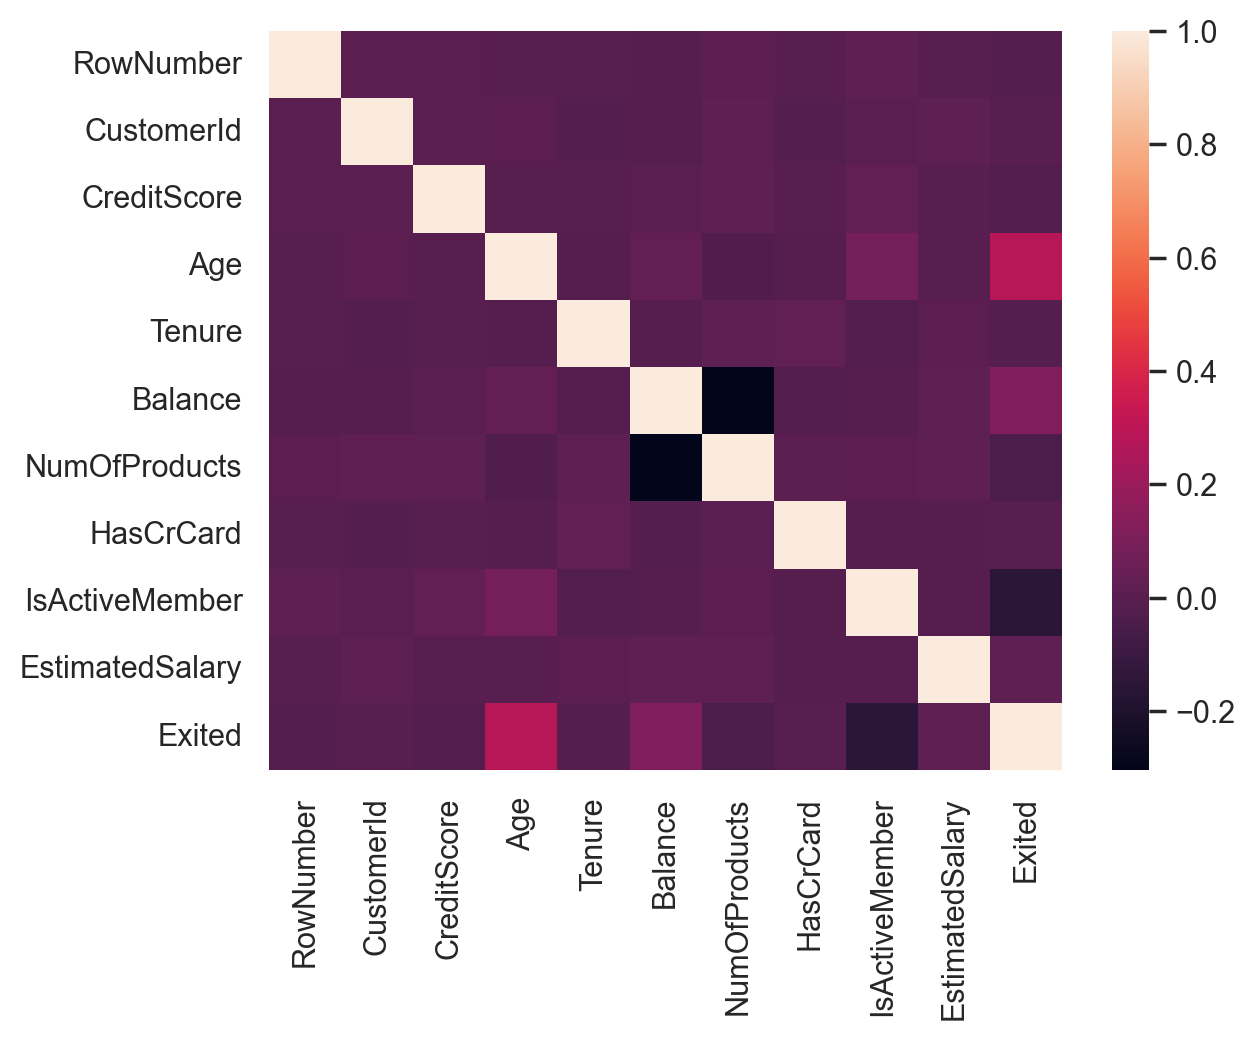

In [4]:
sns.heatmap(df.corr(numeric_only=True), annot=False)

**From the above figure we can say that Active members are not correlated with exit hence we can say that active members are not churned and age is slightly correlated with exit churn.**

# Independent and dependent variable**

In [5]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

**We removed the rownumber, customer id and name as it doesnot give any impact to the determined dependent variable**

In [6]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


**Geography and Gender are of categorical type , we have convert into numerical variables for training**

In [7]:
Gen=pd.get_dummies(x['Gender'],drop_first=True)

**We removed the first column of gender which will lead to reduce the dummy variable trap. As the male column is enought to describe the gender 0- female, 1- male**

In [8]:
Gen.head()

,Male
0,False
1,False
2,False
3,False
4,False


**Likewise we have to do it for Geography variable**

In [9]:
x['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
country=pd.get_dummies(x['Geography'],drop_first=True)

In [11]:
country.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


**We have to drop the geography and gender columns and add the dummy columns**

In [12]:
x=x.drop(['Geography','Gender'],axis=1)

In [13]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [14]:
x=pd.concat([x,Gen,country],axis=1)

In [15]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True


**Now the data is ready for model training**

In [16]:
#Hyperparameters

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
#These are the parameters of XGBoost

In [17]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [18]:
classifier=xgboost.XGBClassifier()

In [19]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_jobs=-1,scoring='roc_auc',n_iter=5,cv=5,verbose=3)

In [20]:
random_search.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [21]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [23]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

**Randomisedsearch CV gives the best hyperparameters for the xgboost**

In [24]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y,cv=10)

In [25]:
score

array([0.873, 0.86 , 0.877, 0.869, 0.865, 0.851, 0.865, 0.874, 0.863,
       0.859])

In [26]:
score.mean()

0.8656